In [1]:
from collections import Counter

import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./genes.xlsx')
data.head()

,PDE6H,GNAT2,ARR3,GNGT2,CNGB3,PDE6C,OPN1LW,OPN1MW,OPN1SW
0,SPI1,SPI1,OTX2,RUNX1,ZNF486,NEUROD1,ZBTB33,HCFC1R1,ZNF384
1,SPI1,MYC,SATB1,SP1,ZNF486,NEUROD1,ZBTB33,DDX20,SMARCA4
2,TRIM28,BRD4,REST,CREBBP,CEBPB,FOXA2,AR,GABPA,ZNF41
3,SPI1,RELA,REST,SPI1,TLE3,SPI1,AR,CEBPB,HSF1
4,BACH2,BRD4,REST,IRF5,SUMO2,SPI1,AR,CEBPB,JUN


In [3]:
GENES = list(data.columns)

In [4]:
GENES

['PDE6H',
 'GNAT2',
 'ARR3',
 'GNGT2',
 'CNGB3',
 'PDE6C',
 'OPN1LW',
 'OPN1MW',
 'OPN1SW']

In [5]:
RESULT = {}
ALL_FACTORS = []

for gene in GENES:
    current_factors = data[gene]
    ALL_FACTORS += list(current_factors)
    current_stats = dict(Counter(current_factors))
    current_stats = dict(sorted(current_stats.items(), key=lambda item: item[1], reverse = True))

    RESULT[gene] = current_stats

In [6]:
RESULT

{'PDE6H': {'SPI1': 32,
  'OTX2': 15,
  'RUNX1': 8,
  'NEUROD1': 7,
  'EP300': 7,
  'CEBPB': 6,
  'BRD4': 6,
  'SMARCA4': 5,
  'FLI1': 5,
  'NFE2': 4,
  'STAT1': 4,
  'NFE2L1': 4,
  'POLR2A': 4,
  'KMT2A': 3,
  'JMJD1C': 3,
  'TCF7L1': 3,
  'MED1': 3,
  'TCF12': 3,
  'BACH1': 3,
  'BACH2': 2,
  'SMAD1': 2,
  'ESR1': 2,
  'GATA1': 2,
  'CEBPA': 2,
  'MED12': 2,
  'H2AZ': 2,
  'MTA2': 2,
  'ZBTB11': 2,
  'FOXA1': 2,
  'REST': 2,
  'NR3C1': 2,
  'STAT5B': 2,
  'ZNF766': 2,
  'ETV6': 2,
  'JUND': 2,
  'IKZF1': 2,
  'GATA3': 2,
  'TRIM28': 1,
  'ARNT': 1,
  'FOXJ2': 1,
  'KLF1': 1,
  'TEAD4': 1,
  'TCF7L2': 1,
  'BCL11A': 1,
  'SPIB': 1,
  'PROX1': 1,
  'NUP98': 1,
  'KLF15': 1,
  'LMNA': 1,
  'SMARCE1': 1,
  'GATA2': 1,
  'CDK9': 1,
  'ERG': 1,
  'RUNX3': 1,
  'ZNF384': 1,
  'PPARG': 1,
  'T': 1,
  'TAL1': 1,
  'POU5F1': 1,
  'ATF2': 1,
  'SATB1': 1,
  'KLF4': 1,
  'KDM5B': 1,
  'SNAI2': 1,
  'SMC1A': 1,
  'CDK8': 1,
  'CTCF': 1,
  'IRF1': 1,
  'STAG1': 1,
  'MAX': 1,
  'BCL3': 1,
  'RAD21'

In [7]:
factor_total_count = Counter(ALL_FACTORS)
top_20_factors = factor_total_count.most_common(20)
top_20_factors

[('AR', 151),
 ('SPI1', 100),
 ('POLR2A', 87),
 ('REST', 77),
 ('OTX2', 65),
 ('FOXA1', 65),
 ('CTCF', 56),
 ('BRD4', 38),
 ('CEBPB', 37),
 ('RUNX1', 33),
 ('H2AZ', 27),
 ('NEUROD1', 23),
 ('SUMO2', 22),
 ('EP300', 20),
 ('RAD21', 20),
 ('ESR1', 18),
 ('RELA', 17),
 ('TERC', 17),
 ('TRIM28', 16),
 ('SMARCA4', 16)]

In [8]:
top_30_factors = factor_total_count.most_common(30)
top_30_factors

[('AR', 151),
 ('SPI1', 100),
 ('POLR2A', 87),
 ('REST', 77),
 ('OTX2', 65),
 ('FOXA1', 65),
 ('CTCF', 56),
 ('BRD4', 38),
 ('CEBPB', 37),
 ('RUNX1', 33),
 ('H2AZ', 27),
 ('NEUROD1', 23),
 ('SUMO2', 22),
 ('EP300', 20),
 ('RAD21', 20),
 ('ESR1', 18),
 ('RELA', 17),
 ('TERC', 17),
 ('TRIM28', 16),
 ('SMARCA4', 16),
 ('ERG', 16),
 ('SMC1A', 16),
 ('STAG1', 14),
 ('MAX', 14),
 ('FLI1', 13),
 ('MED1', 13),
 ('KMT2A', 12),
 ('GATA1', 12),
 ('JUND', 11),
 ('MYB', 11)]

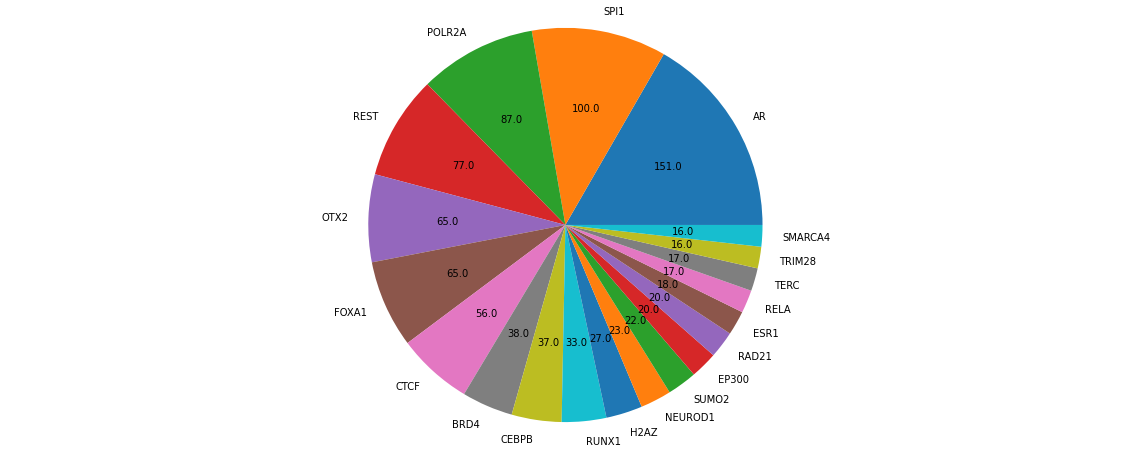

In [9]:
labels = [pair[0] for pair in top_20_factors]
sizes = numpy.array([pair[1] for pair in top_20_factors])

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

fig = plt.figure(1, [20, 8])


plt.pie(sizes, labels=labels, autopct=absolute_value)

plt.axis('equal')

plt.savefig('foo.png', dpi=500)

plt.show()



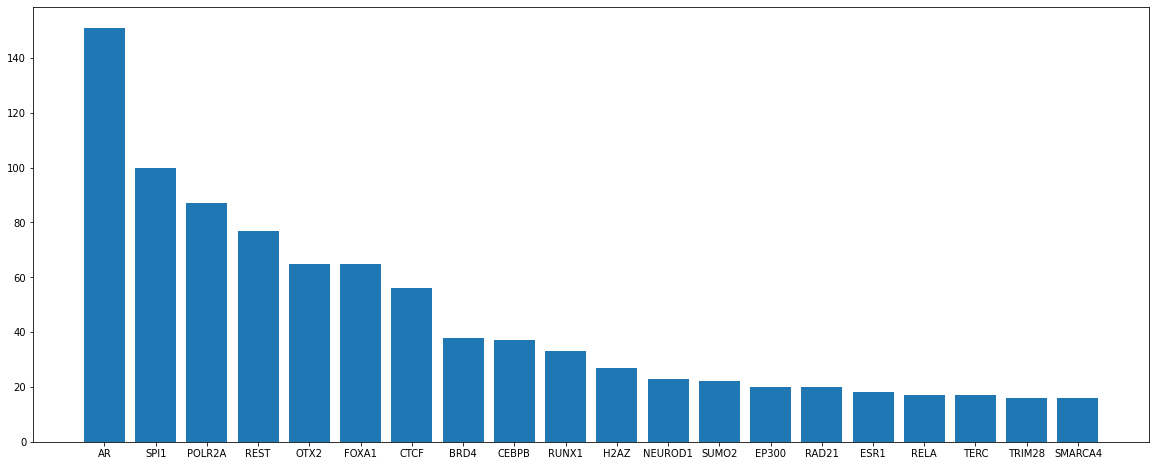

In [10]:
fig = plt.figure(1, [20, 8])

plt.bar(labels, sizes)
plt.savefig('bar.png', dpi=500)
plt.show()

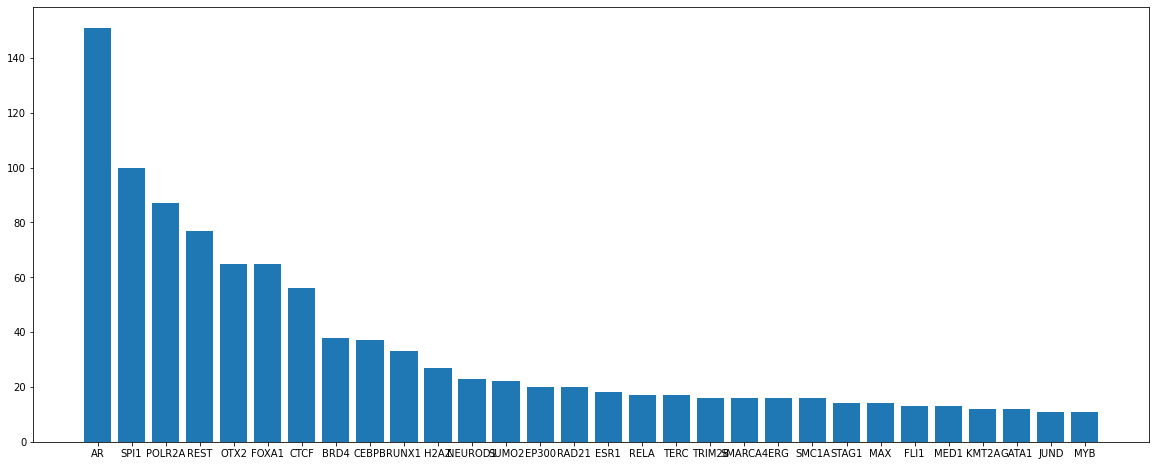

In [11]:
# factor_total_count = Counter(ALL_FACTORS)
# sorted_factors = factor_total_count.most_common()

labels_all = [pair[0] for pair in top_30_factors]
sizes_all = numpy.array([pair[1] for pair in top_30_factors])


fig = plt.figure(1, [20, 8])

plt.bar(labels_all, sizes_all)
plt.savefig('bar.png', dpi=500)
plt.show()